In [1]:
%%html
<style>
table {float:left}
</style>

# Exercise 4: Simple and multiple linear regression analysis

##### Name: Bikas Chandra Bhattarai
##### Date: 28 September, 2015

### 1. Simple regression

Temperature data for a certain month (November 1977) is available from Falun (Dalarna), Gävle (Gästrikland) and Knon (Värmland) (file: temp_falun.txt). For Falun the data series is not complete.

We want to fill the missing data for Falun using the best correlated data set of the three possible data sets:

1. Only the data from Gävle 
2. Only the data from Knon
3. Both Gävle and Knon and the information about distances (Gävle-Falun $ =82$ km, Knon-Falun $ =110$ km)

### Question1: Compute the correlation between Falun and (1), (2) and(3) and determine which one shall be used as the independent variable.

In [2]:
# this allows plots to appear directly in the notebook
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats
from __future__ import division
import matplotlib.pyplot as plt

In [3]:
temp_data = pd.read_table('temp_falun.dat') #reading the table 
df_temp = pd.DataFrame(temp_data)       # Defining the dataframe
df_temp.head(2) # printing the dataframe upto 3 rows only

,Day,T_Falun,T_Gavle,T_Knon
0,1,8.2,9.0,6.5
1,2,6.4,7.8,4.8


Calculating the third datasets from the temperature data of T_Gavle and T_Knon, by using the inverse distance weighting methods:

The equation used for the calculation of third datasets is given in equation 1 given below: 

$T_{Gavle+Knon} = \frac{\left(\frac{1}{82}\right)^2}{\left(\frac{1}{82}\right)^2 + \left(\frac{1}{110}\right)^2}T_{Gavle} + \frac{\left(\frac{1}{110}\right)^2}{\left(\frac{1}{82}\right)^2 + \left(\frac{1}{110}\right)^2}T_{Knon}$...................(1)

In [4]:
# Calculating the third datasets by using equation 1 and inserting the calculated data in to the dataframe.
df_temp['T_Galve_Knon']= (((1/82)**2/((1/82)**2+(1/110)**2))* df_temp['T_Gavle'] + ((1/110)**2/((1/82)**2+(1/110)**2))* df_temp['T_Knon']).round(2)
df_temp.head(2) # printing the dataframe upto 3 rows only

,Day,T_Falun,T_Gavle,T_Knon,T_Galve_Knon
0,1,8.2,9.0,6.5,8.11
1,2,6.4,7.8,4.8,6.73


In [5]:
#printing the lower 10 rows from datasest
df_temp.tail(10)

,Day,T_Falun,T_Gavle,T_Knon,T_Galve_Knon
20,21,-1,-2.0,-3.1,-2.39
21,22,NaN,0.1,-1.1,-0.33
22,23,NaN,-6.2,-5.4,-5.91
23,24,NaN,0.5,-1.9,-0.36
24,25,NaN,-1.9,-3.7,-2.54
25,26,NaN,-6.4,-10.7,-7.94
26,27,NaN,-7.6,-14.9,-10.21
27,28,NaN,0.9,-5.8,-1.49
28,29,NaN,0.5,-10.0,-3.25
29,30,NaN,-1.2,-14.2,-5.84


From this above table, there are no temperature observations in Falun for the days 22 – 30. Therefore there are gaps in the table for these days.

For the calculation of these parameters only the data from the 1st until the 21st day are used. Otherwise it would not be comparable to the data from Falun.

In [6]:
# removing the lower 9 rows and Day column from datasets
df_temp_21 = df_temp[:-9].drop('Day',1) # :-9 is for removing lower 9 rows, and drop ('Day',1) is for removing Day column

In [7]:
# calculating the correlation between each temperature datasets
df_corr = df_temp_21.corr()
print np.round(df_corr,3)

              T_Falun  T_Gavle  T_Knon  T_Galve_Knon
T_Falun         1.000    0.984   0.970         0.993
T_Gavle         0.984    1.000   0.937         0.991
T_Knon          0.970    0.937   1.000         0.976
T_Galve_Knon    0.993    0.991   0.976         1.000


##### Conclusion:
As the correlation coefficient $ r_{x;y} = 0, 9932$  of $T_{Falun}$ and $T_{Gävle+Knon}$ is highest, the combination of these two samples is best linearly correlated. Therefore $T_{Gävle+Knon}$ should be used as independent variable to calculate the temperature in Falun.

### Question2: Calculate the regression coefficients and how much of the variance is explained by the regression model, i.e. the R² values.

Simple linear regression equation can be written as in the following form:

$y = a + b x $............(2)

Where,

$a$ is the intercept

$b$ is the coefficient for x

Together, $a$ and a are called the regression coefficients and can be calculated by using the python function described below:

In [8]:
# Importing the statistical model
import statsmodels.formula.api as smf

# create a fitted model between T_Galun as dependent variable and T_Gavle as indipendent variable 
fg = smf.ols(formula='T_Falun ~ T_Gavle', data=df_temp_21).fit()

#print summary statistics
print(fg.summary())

                            OLS Regression Results                            
Dep. Variable:                T_Falun   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     564.5
Date:                Mon, 28 Sep 2015   Prob (F-statistic):           1.36e-15
Time:                        11:53:40   Log-Likelihood:                -25.683
No. Observations:                  21   AIC:                             55.37
Df Residuals:                      19   BIC:                             57.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.3989      0.222     -1.800      0.0

So the equation (2) becomes:
    
$y = -0.3989+0.9292*x$

and the coefficient of determination (R² = 0.967)

Linear regression equation for T_Falun as dependent variable and T_Knon as indipendent variables

In [9]:
# create a fitted model between T_Galun as dependent variable and T_Knon as an indipendent variable 
fg = smf.ols(formula='T_Falun ~ T_Knon', data=df_temp_21).fit()
#print summary statistics
print(fg.summary())

                            OLS Regression Results                            
Dep. Variable:                T_Falun   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     301.9
Date:                Mon, 28 Sep 2015   Prob (F-statistic):           4.04e-13
Time:                        11:53:40   Log-Likelihood:                -31.960
No. Observations:                  21   AIC:                             67.92
Df Residuals:                      19   BIC:                             70.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.2902      0.262      4.930      0.0

When T_Falun as dependent variable and T_Knon as an indipendent variable then the liear regression equation and coefficient of determination (R²) becomes:

$y = 1.2902 +0.8280 *x$

and the coefficient of determination (R² = 0.941)

Linear regression equation for T_Falun as dependent variable and T_Galve_Knon as indipendent variables

In [10]:
# create a fitted model between T_Galun as dependent variable and T_Galve_Knon as an indipendent variable 
fg = smf.ols(formula='T_Falun ~ T_Galve_Knon', data=df_temp_21).fit()
#print summary statistics
print(fg.summary())

                            OLS Regression Results                            
Dep. Variable:                T_Falun   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1395.
Date:                Mon, 28 Sep 2015   Prob (F-statistic):           3.00e-19
Time:                        11:53:40   Log-Likelihood:                -16.387
No. Observations:                  21   AIC:                             36.77
Df Residuals:                      19   BIC:                             38.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.1841      0.134      1.369   

When T_Falun as dependent variable and T_Galve_Knon act as a an indipendent variable then the liear regression equation and coefficient of determination (R²) becomes:

$y = 0.1841  +0.9176 *x$

and the coefficient of determination (R² = 0.987)

In summary:

###### Table 1

Dependent and indipendent variables|Linear Regression Equation|R² |
--- |---   |---
T_Falun as dependent, T_Gavle as an indipendent| $y = -0.3989+0.9292*x$| 0.967 
T_Falun as dependent, T_Knon as an indipendent|$y = 1.2902 +0.8280 *x$  | 0.941
T_Falun as dependent, T_Galve_Knon as an indipendent|$y = 0.1841  +0.9176 *x$  | 0.987

##### Conclusion:

It is clear from the Table 1 that the coefficient of determination (R²) for the linear regression model with T_Falun as dependent variable and T_Galve_Knon as an indipendent variable is highest so this model should be used as a model for predicting the missing temperature for the station T_Falun.


### Question3: Test the significance of the regression coefficients

From the above table 1, our selected regression model is $y = 0.1841  +0.9176 *x$ on the basis of good coefficient of determination.

##### Table 2
Coefficient|t_critical|P |[95.0% Conf. Int.]|
:---:        |---|--|---
a   |1.369|0.187  |-0.097-----0.466
b   |37.353| 0.000|0.866-----0.969 

##### Hypothesis test for **a** 

Now formulating the test hypothesis for the coefficients to test wheather the coefficients are significantly different or not and the test hypothesis can be formulated as given below:

$H_0 : a = 0$

$H_a : a \neq 0$

Now we have all the calculated statistics (from the summary statistics of best fit model) required for this test and are shown in table 2, where **t** is the calculated **t-value** and **p** is the probability

**Testing approach 1:** 

Based on **t_critical value**

If the $|t|> t_{critical}$, then $H_0$ is rejected

From the table $t_{critical} = t_{1-\frac{\alpha }{2}}; n-1$ = 2.093

Hence, $T_{critical}$ value is greater then **t** value so ${H_0}$ is not rejected 

**Approach 2:**

Based on **P** value

If the $p > \alpha$ then $H_0$ is rejected

Here, also P value (0.187) is not smaller than ($\alpha = 0.05)$ so $H_0$ is not rejected

**Approach 3:**

Based on **confidence intervals**

Since the conficence intervals is (-0.097 to 0**Testing approach 1:** 

Based on **t_critical value**

If the $|t|> t_{critical}$, then $H_0$ is rejected

From the table $t_{critical} = t_{1-\frac{\alpha }{2}}; n-1$ = 2.093

Hence, $T_{critical}$ value is greater then **t** value so ${H_0}$ is not rejected 

**Approach 2:**

Based on **P** value

If the $p > \alpha$ then $H_0$ is rejected

Here, also P value (0.187) is not smaller than ($\alpha = 0.05)$ so $H_0$ is not rejected

**Approach 3:**

Based on **confidence intervals**

Since the conficence intervals is (-0.097 to 0.466) so there is a possibility that the value **0** should be within this confidence intervals.


**Conclusion**

From above all test it is clear that the $H_0$ is not rejected and concluded that the value of **a** is not signigicantly different from the value **0** at the 95% confidence interval.

##### Hypothesis test for **b** 


$H_0 : b = 0$

$H_a : b \neq 0$


**Testing approach 1:** 

Based on **t_critical value**

If the $|t|> t_{critical}$, then $H_0$ is rejected

From the table $t_{critical} = t_{1-\frac{\alpha }{2}}; n-1$ = 2.093

and |t| = 37.353

Hence, $T_{critical}$ value is less then **|t|** value so ${H_0}$ is rejected 

**Approach 2:**

Based on **P** value

If the $p > \alpha$ then $H_0$ is rejected

Here, also P value (0.00) is smaller than ($\alpha = 0.05)$ so $H_0$ is rejected

**Approach 3:**

Based on **confidence intervals**

Since the conficence intervals is (0.866 to0.969) so there is no possibility that the value **0** lies within this confidence intervals, so $H_0$ is rejected

**Conclusion**

From the above test it is clear  that the $H_0$ is rejected and concluded that the value of **b** is signigicantly different from the value **0** at 95% confidence interval.


### Question4: Plot the time series of the observed and calculated dependent variable including the extended values on the same graph

From the above all possible regression analysis, the best fit model is obtained from the regression between T_Falun with T_Galve_Knon. Hence our model for the estimation becomes:

$y = 0.1841  +0.9176 *x$ . By using this equation the missing data of T_Falun is estimated and plotted as follows:


In [11]:
# Estimating the temperature by using best fitted regression equation
Estimated = (0.1841  +0.9176 * df_temp['T_Galve_Knon']).round(2)

# Filling missing value for T_Falun and assigning the name T_Falun_Fill
df_temp['T_Falun_Fill'] = df_temp['T_Falun'].fillna(Estimated)

In [12]:
# Showing the lower part of dataframe with filling missing data
print df_temp.tail(10)

    Day  T_Falun  T_Gavle  T_Knon  T_Galve_Knon  T_Falun_Fill
20   21       -1     -2.0    -3.1         -2.39         -1.00
21   22      NaN      0.1    -1.1         -0.33         -0.12
22   23      NaN     -6.2    -5.4         -5.91         -5.24
23   24      NaN      0.5    -1.9         -0.36         -0.15
24   25      NaN     -1.9    -3.7         -2.54         -2.15
25   26      NaN     -6.4   -10.7         -7.94         -7.10
26   27      NaN     -7.6   -14.9        -10.21         -9.18
27   28      NaN      0.9    -5.8         -1.49         -1.18
28   29      NaN      0.5   -10.0         -3.25         -2.80
29   30      NaN     -1.2   -14.2         -5.84         -5.17


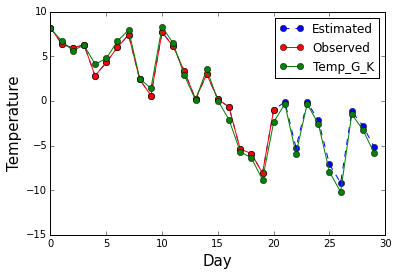

In [21]:
# Plotting Observed and an Estimated temperature for T_Falun
plt.plot(df_temp['T_Falun_Fill'],'bo--')
plt.plot(df_temp['T_Falun'], 'ro-')
plt.plot(df_temp['T_Galve_Knon'],'go-')
plt.legend(['Estimated', 'Observed','Temp_G_K'])
plt.xlabel('Day', size = 15)
plt.ylabel('Temperature', size = 15)

## 2. Multiple linear regression

a) In the file multidata.txt there are a number of numerical variables. Chose Y as dependent variable and x1, x2, x3 as independent variables. Perform a forward stepwise multiple regression and also a standard multiple regression. 

In a forward stepwise multiple regression, start with performing a simple regression using the independent variable which is best correlated with the dependent variable. Then add another independent variable, and make sure that this second independent variable should have the higher partial correlation with the dependent while the influence of the first independent variable is removed. Continue this procedure to see if the addition of a third independent variable will be helpful. In a standard multiple regression, all the independent variables are used in the regression model. By analysing the result of the regression, you could figure out if some independent variables do not significantly contribute to the regression. If there are any, remove them from the model and redo the regression with only the significant independent variables.

b) Present in each case the $R^2$ values and the regression equations.

c) In the forward stepwise method present also your F-test results (use $\alpha$ = 5%)

d) What are your conclusions?

In [14]:
multi = pd.read_table('multidata.txt') #reading in the data
#defining the dataframe
df = pd.DataFrame(multi)
df.head()

,X1,X2,X3,Y
0,1,2,10,5.077
1,2,2,9,32.330
2,3,3,5,65.140
3,4,4,4,47.270
4,5,2,9,80.570


In [15]:
#calculating correlation between all
multi.corr()

,X1,X2,X3,Y
X1,1.000000,-0.048404,-0.142982,0.624132
X2,-0.048404,1.000000,0.252610,0.264732
X3,-0.142982,0.252610,1.000000,0.586944
Y,0.624132,0.264732,0.586944,1.000000


From this table it is clear that the correlation between Y as a dependent variable and X1 as an indipendent variable have highest correlation coefficient after that Y with X3 have second highest correlation coefficient so
the first regression equation becomes:


In [16]:
#calculating regression equation by using the ols function in python where, Y as dependent and X1 as an indipendent
#variable.
ols1 = smf.ols(formula='Y ~ X1', data=multi).fit()
print ols1.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     9.572
Date:                Mon, 28 Sep 2015   Prob (F-statistic):            0.00741
Time:                        11:53:41   Log-Likelihood:                -78.599
No. Observations:                  17   AIC:                             161.2
Df Residuals:                      15   BIC:                             162.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.9956     14.461      0.691      0.5

/home/bikascb/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  int(n))


So the regression equation becomes:
    
 $y=  9.9956+ 11.9826*x$ 

In [17]:
#calculating regression equation by using the ols function in python
ols2 = smf.ols(formula='Y ~ X1 + X3', data=multi).fit()
print ols2.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     41.72
Date:                Mon, 28 Sep 2015   Prob (F-statistic):           1.26e-06
Time:                        11:53:41   Log-Likelihood:                -66.303
No. Observations:                  17   AIC:                             138.6
Df Residuals:                      14   BIC:                             141.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -14.2231      8.102     -1.756      0.1

In this case the equation becomes:
$-14.2231+13.8775b+1.3498x$

In [18]:
#calculating the regression coefficient with Y as dependent and X1, X2 and X3 as indipendent variables.
ols3 = smf.ols(formula='Y ~ X1 + X2 + X3', data=multi).fit()
print ols3.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     29.81
Date:                Mon, 28 Sep 2015   Prob (F-statistic):           4.27e-06
Time:                        11:53:41   Log-Likelihood:                -65.247
No. Observations:                  17   AIC:                             138.5
Df Residuals:                      13   BIC:                             141.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -22.8259     10.270     -2.223      0.0

###### Table 3

Dependent and indipendent variables| Regression Equation|R² |
--- |---   |---
Y as dependent, X1 as an indipendent| $y = 9.9956+11.9826*b$| 0.390
Y as dependent, X1,X3 as an indipendent|$y = -14.2231 +13.8775 *b1+1.3498*b2$  | 0.856
Y as dependent, X1,X2,X3 as an indipendent|$y = -22.8259  +13.9098 *b1+3.8826*b2+1.2841*b3$  | 0.873

**Conclusion**

From all above combination it is clear that the model with Y as a dependent variables and X1, X2 and X3 as an indipendent variables has high R² value so this is the best fitted model amongst others.

### Perform the F- test (alpha = 0.05) for adding indipendent variables.

#### Test for adding the third independent Variable (X3)

F -Test for Testing the Significance By using the F -Test one can find out, whether adding a variable is significant or not.The test statistic is

$F =  \frac{1-R²_{n-1} (N-n-1)}{1-R²_{n} (N-n-2)}$---------------(3)

whereas N is the number of data and n is the number of independent variables used. If $F > F_{1−α;N −n−1;N −n−2}$ , the addition of $X_n$ is significant. In the case of the three variables X1 , X3 and Y one obtaines at a significance level of α = 0.05

Calculating the value of F by using equation 3, where

$R²_{n-1}=0.390$

$R²_n= 0.856$

N = 17

The calculation are done in the code cell below:

In [19]:
round(((1-0.390)*14)/((1-0.856)*13),2)

4.56

Here, 

$F = 4.56$

$F _{0,95;14;13} = 2.55$

**Conclusion:**
Here, 4.56 > 2.55, which is a true statement. That means that adding X3 to the regression is significant.

### Test for adding the third independent Variable (X2)

Again the F -test is performed to check whether adding the independent variable X2 to the regression is significant or not by using the same equation as above (α = 0, 05).

$F > F_{0.95;13;12}$

Calculating the value of F by using equation 3, where

$R²_{n-1}=0.856$

$R²_n= 0.873$

N = 17

The calculation are done in the code cell below:

In [20]:
round(((1-0.856)*13)/((1-0.873)*12),2)

1.23

**Conclusion:**
As this is a false statement one can conclude, that adding X2 as a third independent variable to the regression is not significant. That means a regression with X1 and X3 as independent variables will be adequately exact.